# Original Data

In [2]:
import pandas as pd

# Load the training dataset
df = pd.read_csv("train.csv")

# Show the first few rows
print(df.head())

# Basic info
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

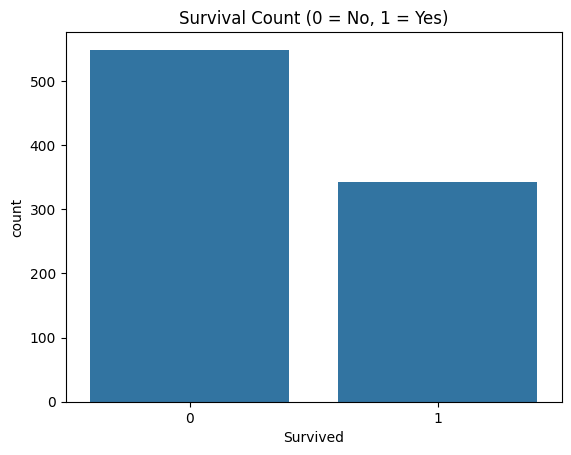

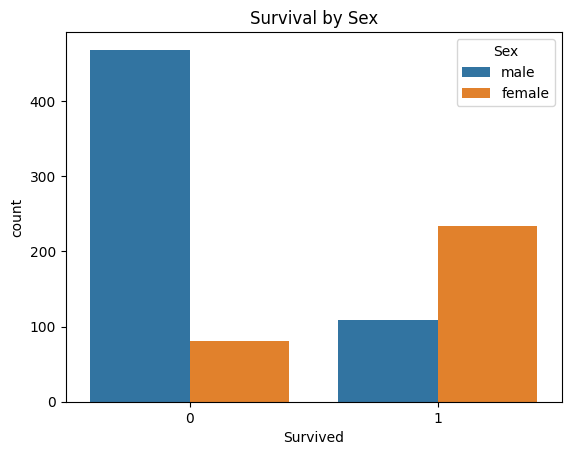

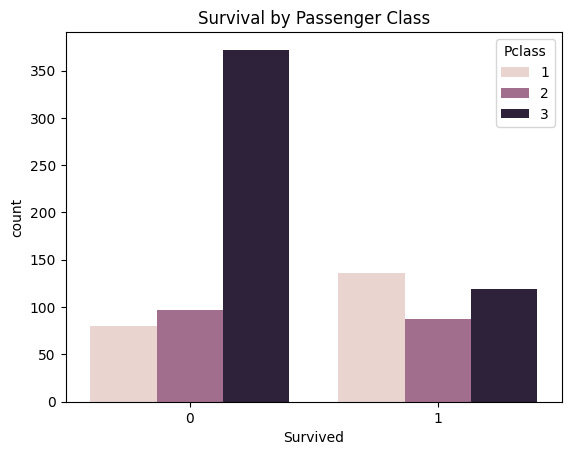

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

# Survival by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Sex")
plt.show()

# Survival by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()

In [4]:
# Check for nulls
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Data after Feature Engineering

In [5]:
# Load cleaned training data
df = pd.read_csv("train_cleaned.csv")

Describe the information

In [7]:
print(df.shape)

(891, 15)


In [8]:
print(df.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')


In [9]:
print(df.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  FamilySize  IsAlone  \
0         0       3  22.0      1      0   7.2500           2        0   
1         1       1  38.0      1      0  71.2833           2        0   
2         1       3  26.0      0      0   7.9250           1        1   
3         1       1  35.0      1      0  53.1000           2        0   
4         0       3  35.0      0      0   8.0500           1        1   

   Sex_male  Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  \
0      True       False        True       False      True      False   
1     False       False       False       False     False       True   
2     False       False        True        True     False      False   
3     False       False        True       False     False       True   
4      True       False        True       False      True      False   

   Title_Rare  
0       False  
1       False  
2       False  
3       False  
4       False  


In [10]:
print(df.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208   
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429   
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400   
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200   
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000   
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200   

       FamilySize     IsAlone  
count  891.000000  891.000000  
mean     1.904602    0.602694  
std      1.613459    0.489615  
min      1.000000    0.000000  
25%      1.000000    0.000000  
50%      1.000000    1.000000  
75%      2.000000    1.000000  
max     11.000

In [11]:
print(df.isnull().sum())

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
FamilySize    0
IsAlone       0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title_Miss    0
Title_Mr      0
Title_Mrs     0
Title_Rare    0
dtype: int64


Correlation Heatmap

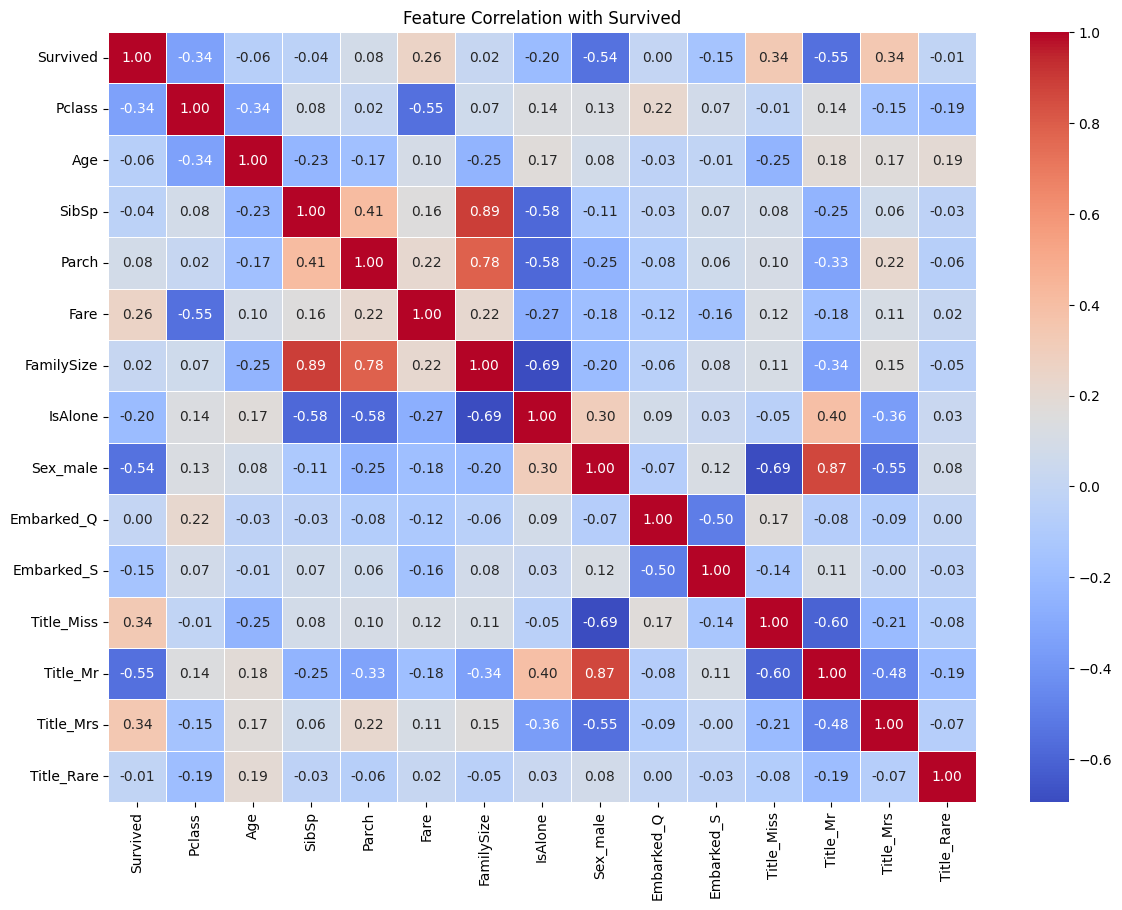

In [12]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation with Survived")
plt.show()

Family Size v.s. Survival

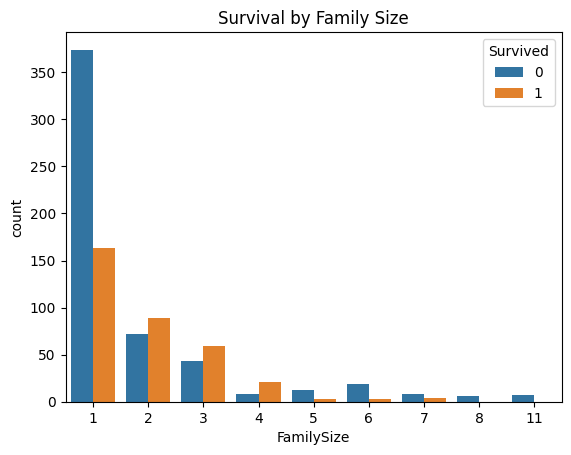

In [13]:
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Survival by Family Size")
plt.show()

Is Alone v.s. Survival

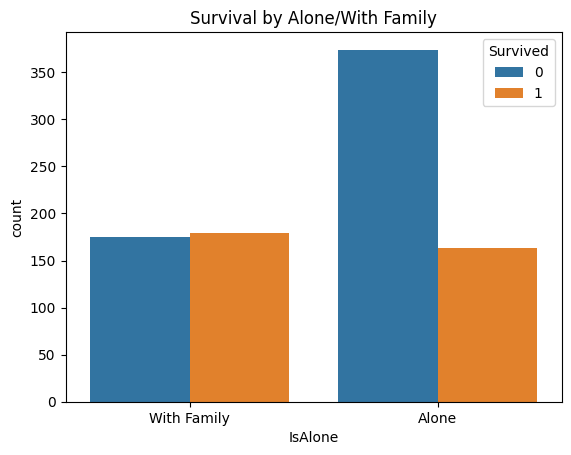

In [14]:
sns.countplot(x='IsAlone', hue='Survived', data=df)
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.title("Survival by Alone/With Family")
plt.show()

Fare v.s. Survival

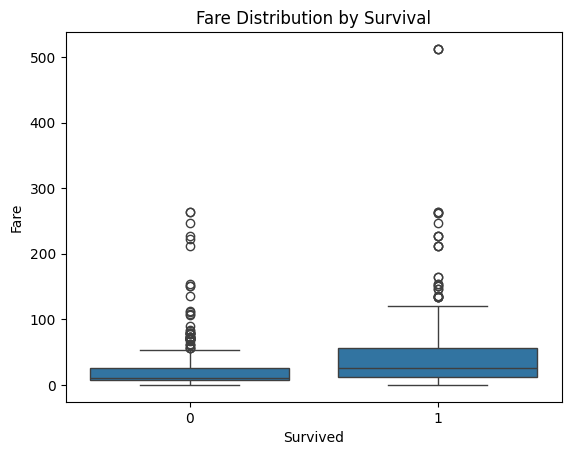

In [15]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival")
plt.show()

Title features

In [16]:
title_cols = [col for col in df.columns if col.startswith('Title_')]
print("Title features:", title_cols)

Title features: ['Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']


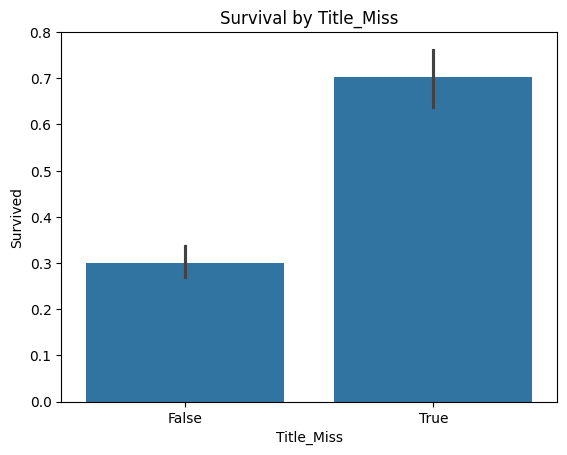

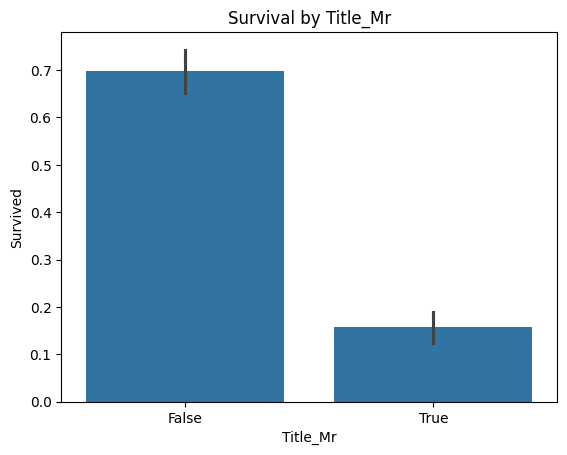

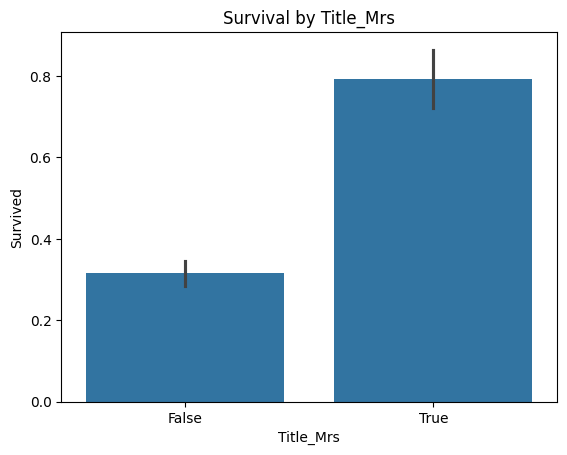

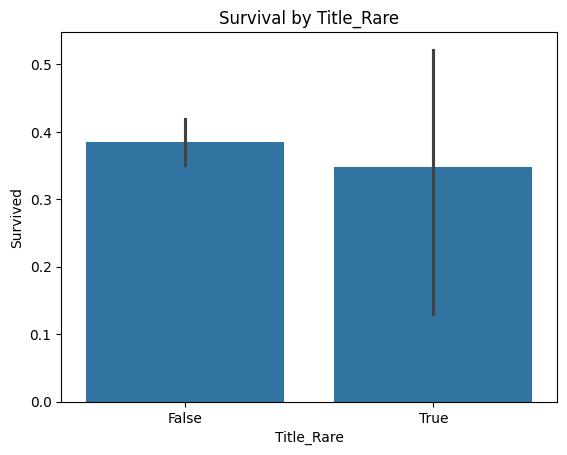

In [17]:
for col in title_cols:
    sns.barplot(x=df[col], y=df['Survived'])
    plt.title(f"Survival by {col}")
    plt.show()